In [1]:
import rasterio
import numpy as np
from pathlib import Path

frac_path = Path("PostProcessing/Masked/FracMap_tae_8_crevasse_gray.tif")
mask_path = Path("PostProcessing/Masked/DataMask_tae_8_crevasse_gray.tif")

with rasterio.open(frac_path) as src:
    frac = src.read(1)

with rasterio.open(mask_path) as src:
    mask = src.read(1)

print("FracMap unique values:", np.unique(frac))
print("DataMask unique values:", np.unique(mask))

print("Mask % valid:", mask.mean())


FracMap unique values: [0 1]
DataMask unique values: [0 1]
Mask % valid: 0.9980730154547323


In [2]:
import xarray as xr
import numpy as np

ds = xr.open_dataset("PostProcessing/Masked/tae_8_crevasse_gray.nc")

# First tile
img = ds["image_data"].isel(tile=0).values
lbl = ds["label_data"].isel(tile=0).values
fd0 = float(ds["fracture_density"].isel(tile=0).values)

print("Tile 0 image: min, max, mean =", img.min(), img.max(), img.mean(), img.dtype)
print("Tile 0 label: min, max, mean =", lbl.min(), lbl.max(), lbl.mean(), lbl.dtype)
print("Tile 0 fracture_density from NC =", fd0)


Tile 0 image: min, max, mean = 17 253 161.025371373039 int16
Tile 0 label: min, max, mean = 0 1 0.154750335508353 int16
Tile 0 fracture_density from NC = 0.15475033223628998


In [3]:
# All fracture densities
fds = ds["fracture_density"].values

print("fracture_density stats: min=", fds.min(), "max=", fds.max())

# Index of the tile with the highest fracture density
best_idx = int(np.argmax(fds))
print("Tile with max fracture density:", best_idx, "value:", fds[best_idx])

img_best = ds["image_data"].isel(tile=best_idx).values
lbl_best = ds["label_data"].isel(tile=best_idx).values

print("Best tile img min/max:", img_best.min(), img_best.max())
print("Best tile lbl min/max:", lbl_best.min(), lbl_best.max())


fracture_density stats: min= 0.0020708963 max= 0.5214957
Tile with max fracture density: 96 value: 0.5214957
Best tile img min/max: 16 241
Best tile lbl min/max: 0 1


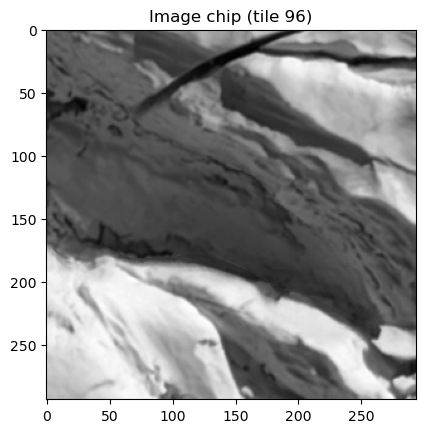

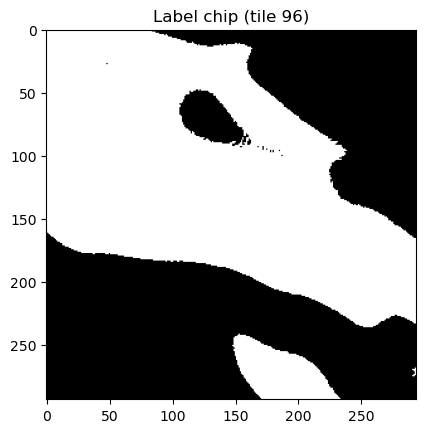

In [4]:
import matplotlib.pyplot as plt

plt.figure(); plt.imshow(img_best, cmap="gray"); plt.title(f"Image chip (tile {best_idx})")
plt.figure(); plt.imshow(lbl_best, cmap="gray", vmin=0, vmax=1); plt.title(f"Label chip (tile {best_idx})")
plt.show()


In [5]:
import rasterio
from pathlib import Path
import numpy as np

frac_path = Path("PostProcessing/Masked/FracMap_tae_8_crevasse_gray.tif")
wv_path   = Path("InputImages/tae_8_crevasse_gray.tif")  # or whatever your real WV tif is

with rasterio.open(frac_path) as src:
    frac = src.read(1)
print("FracMap min/max:", frac.min(), frac.max())

with rasterio.open(wv_path) as src:
    wv = src.read(1)
print("WV image min/max:", wv.min(), wv.max())


FracMap min/max: 0 1
WV image min/max: 0.0 1.0


Tile 0 image: min, max, mean = 17 253 161.025371373039 int16
Tile 0 label: min, max, mean = 0 1 0.154750335508353 int16
Tile 0 fracture_density from NC = 0.15475033223628998


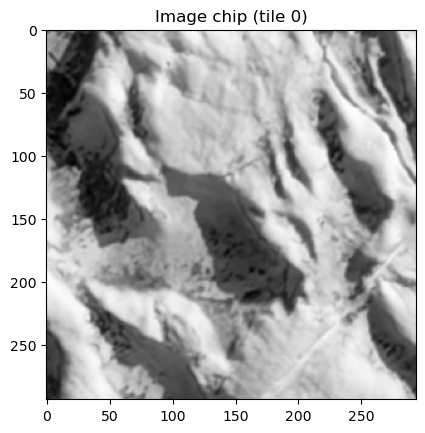

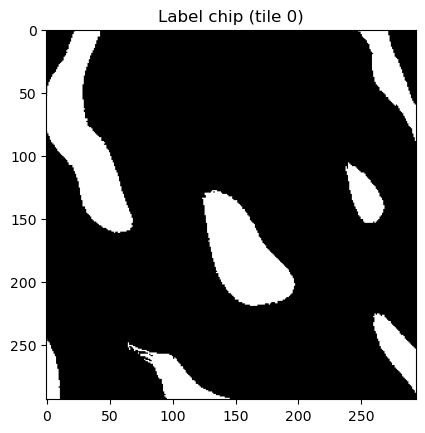

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

ds = xr.open_dataset("PostProcessing/Masked/tae_8_crevasse_gray.nc")

img = ds["image_data"].isel(tile=0).values
lbl = ds["label_data"].isel(tile=0).values
fd0 = float(ds["fracture_density"].isel(tile=0).values)

print("Tile 0 image: min, max, mean =", img.min(), img.max(), img.mean(), img.dtype)
print("Tile 0 label: min, max, mean =", lbl.min(), lbl.max(), lbl.mean(), lbl.dtype)
print("Tile 0 fracture_density from NC =", fd0)

plt.figure(); plt.imshow(img, cmap="gray"); plt.title("Image chip (tile 0)")
plt.figure(); plt.imshow(lbl, cmap="gray", vmin=0, vmax=1); plt.title("Label chip (tile 0)")
plt.show()


Best tile img min/max: 16 241
Best tile lbl min/max: 0 1


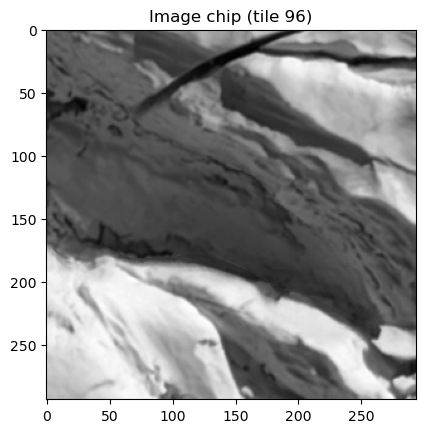

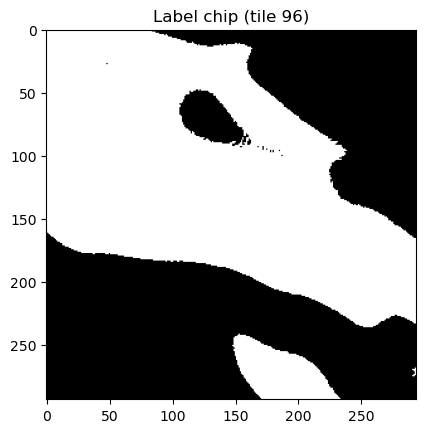

In [7]:
fds = ds["fracture_density"].values
best_idx = int(np.argmax(fds))

img_best = ds["image_data"].isel(tile=best_idx).values
lbl_best = ds["label_data"].isel(tile=best_idx).values

print("Best tile img min/max:", img_best.min(), img_best.max())
print("Best tile lbl min/max:", lbl_best.min(), lbl_best.max())

plt.figure(); plt.imshow(img_best, cmap="gray"); plt.title(f"Image chip (tile {best_idx})")
plt.figure(); plt.imshow(lbl_best, cmap="gray", vmin=0, vmax=1); plt.title(f"Label chip (tile {best_idx})")
plt.show()


In [8]:
import xarray as xr
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

root = Path("/home/omerakil/CrevasseCNN")
nc_path = root / "PostProcessing" / "Masked" / "tae_8_crevasse_gray.nc"
csv_path = root / "PostProcessing" / "Masked" / "FracTiles_tae_8_crevasse_gray.csv"

ds = xr.open_dataset(nc_path)
df = pd.read_csv(csv_path)

print(ds)
print(df.head())


<xarray.Dataset> Size: 113MB
Dimensions:           (tile: 328, y: 294, x: 294)
Coordinates:
  * tile              (tile) int32 1kB 1 2 3 4 5 6 7 ... 323 324 325 326 327 328
    y                 (tile) float64 3kB ...
    x                 (tile) float64 3kB ...
Data variables:
    image_data        (tile, y, x) int16 57MB ...
    label_data        (tile, y, x) int16 57MB ...
    id                (tile) int32 1kB ...
    x_start           (tile) int32 1kB ...
    x_stop            (tile) int32 1kB ...
    y_start           (tile) int32 1kB ...
    y_stop            (tile) int32 1kB ...
    fracture_density  (tile) float32 1kB ...
Attributes:
    source_image:  tae_8_crevasse_gray
    crs:           EPSG:3413
    kernel_size:   294
   id  x_start  x_stop  y_start  y_stop        x_coord       y_coord  \
0   1       78     371       84     377  575422.255973  2.475029e+06   
1   2      372     665       84     377  575433.766071  2.475029e+06   
2   3      666     959       84     377  5